# Instalando e carregando as bibliotecas

In [1]:
!pip install yfinance prophet

     --------------------------------------- 12.9/12.9 MB 34.4 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB ? eta 0:00:00
     ------------------------------------- 514.2/514.2 kB 31.5 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB ? eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 30.2 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732051 sha256=a06c99b8ef1114abbcc082cd9214efe4452dfd3687a40b02c0e8c069c90b0e08
  Stored in directory: c:\users\mizin\appdata\local\pip\cache\wheels\74\47\c4\678b0a3d5213e2f8500f3ea0f8dc3c81478e5b806c557dff58
Successfully built pymeeus


In [3]:
import yfinance as yf

In [4]:
ticker = input("Digite o código da ação: ")
dados = yf.Ticker(ticker).history("2y")
dados.head()

Digite o código da ação: PETR4.SA


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-02 00:00:00-03:00,11.951576,12.266206,11.912247,12.178809,103985100,0.0,0.0
2021-06-04 00:00:00-03:00,12.261835,12.506548,12.200657,12.454109,102757300,0.0,0.0
2021-06-07 00:00:00-03:00,12.454111,12.475960,12.239987,12.362344,74548900,0.0,0.0
2021-06-08 00:00:00-03:00,12.309906,12.585207,12.218138,12.524029,88398600,0.0,0.0
2021-06-09 00:00:00-03:00,12.550248,12.707563,12.462851,12.524029,60724200,0.0,0.0


<Axes: xlabel='Date'>

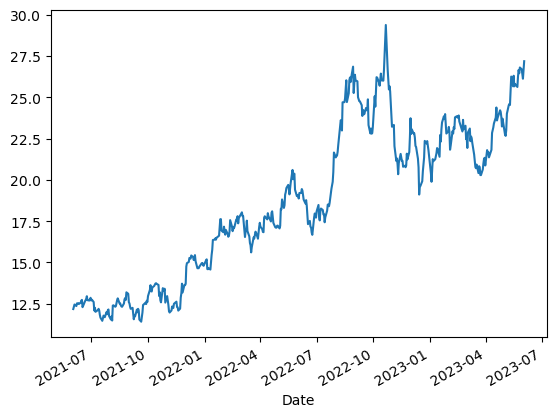

In [7]:
dados["Close"].plot()

# Tratamento de dados

In [8]:
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-02 00:00:00-03:00,11.951576,12.266206,11.912247,12.178809,103985100,0.0,0.0
2021-06-04 00:00:00-03:00,12.261835,12.506548,12.200657,12.454109,102757300,0.0,0.0
2021-06-07 00:00:00-03:00,12.454111,12.475960,12.239987,12.362344,74548900,0.0,0.0
2021-06-08 00:00:00-03:00,12.309906,12.585207,12.218138,12.524029,88398600,0.0,0.0
2021-06-09 00:00:00-03:00,12.550248,12.707563,12.462851,12.524029,60724200,0.0,0.0


In [22]:
# resetando o índice do DataFrame
treinamento = dados.reset_index()

# selecionando as colunas de data e valor de fechamento
treinamento = treinamento[["Date", "Close"]]

# retirando o timezone (fuso horário) da coluna de data
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)

# renomeando as colunas (o Prophet precisa receber os dados com esse padrão)
treinamento.columns = ["ds", "y"]

treinamento

,ds,y
0,2021-06-02,12.178809
1,2021-06-04,12.454109
2,2021-06-07,12.362344
3,2021-06-08,12.524029
4,2021-06-09,12.524029
...,...,...
494,2023-05-26,26.799999
495,2023-05-29,26.690001
496,2023-05-30,26.389999
497,2023-05-31,26.120001


# Treinando o modelo de Machine Learning

In [23]:
!pip install prophet

In [26]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [27]:
# criar o modelo de IA (ML)
modelo = Prophet()

In [28]:
# treinar modelo com os dados de treinamento
modelo.fit(treinamento)

00:42:24 - cmdstanpy - INFO - Chain [1] start processing
00:42:24 - cmdstanpy - INFO - Chain [1] done processing


# Realizar previsões

In [30]:
periodo = modelo.make_future_dataframe(periods=90) # em dias 

In [33]:
periodo.tail(20)

,ds
569,2023-08-12
570,2023-08-13
571,2023-08-14
572,2023-08-15
573,2023-08-16
574,2023-08-17
575,2023-08-18
576,2023-08-19
577,2023-08-20
578,2023-08-21


In [32]:
previsoes = modelo.predict(periodo)

In [34]:
previsoes

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-02,15.354647,13.777110,15.724319,15.354647,15.354647,-0.620701,-0.620701,-0.620701,0.636331,0.636331,0.636331,-1.257032,-1.257032,-1.257032,0.0,0.0,0.0,14.733946
1,2021-06-04,15.225573,13.489569,15.224353,15.225573,15.225573,-0.907589,-0.907589,-0.907589,0.683661,0.683661,0.683661,-1.591250,-1.591250,-1.591250,0.0,0.0,0.0,14.317984
2,2021-06-07,15.031961,12.712233,14.505294,15.031961,15.031961,-1.424505,-1.424505,-1.424505,0.633620,0.633620,0.633620,-2.058124,-2.058124,-2.058124,0.0,0.0,0.0,13.607457
3,2021-06-08,14.967424,12.523626,14.350961,14.967424,14.967424,-1.548134,-1.548134,-1.548134,0.647230,0.647230,0.647230,-2.195364,-2.195364,-2.195364,0.0,0.0,0.0,13.419290
4,2021-06-09,14.902887,12.265318,14.110633,14.902887,14.902887,-1.683977,-1.683977,-1.683977,0.636331,0.636331,0.636331,-2.320308,-2.320308,-2.320308,0.0,0.0,0.0,13.218909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,2023-08-27,29.251743,28.950053,32.145536,27.955902,30.681844,1.327923,1.327923,1.327923,-1.643533,-1.643533,-1.643533,2.971456,2.971456,2.971456,0.0,0.0,0.0,30.579667
585,2023-08-28,29.288792,31.401107,34.564847,27.979229,30.742237,3.620467,3.620467,3.620467,0.633620,0.633620,0.633620,2.986847,2.986847,2.986847,0.0,0.0,0.0,32.909259
586,2023-08-29,29.325842,31.255575,34.728305,27.999156,30.802081,3.639578,3.639578,3.639578,0.647230,0.647230,0.647230,2.992348,2.992348,2.992348,0.0,0.0,0.0,32.965419
587,2023-08-30,29.362891,31.392918,34.722035,28.009795,30.864900,3.624182,3.624182,3.624182,0.636331,0.636331,0.636331,2.987851,2.987851,2.987851,0.0,0.0,0.0,32.987072


# Gerar a Visualização Gráfica

In [37]:
plot_plotly(modelo, previsoes, xlabel = "período", ylabel="valor")